In [1]:
from DataFrame import PriceDemand, Cities
from Series import Speed, Direction
from config import COLUMNS
from Time import Hours, Date, DateTime

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import timedelta, date
import math
from random import random

In [2]:
def nan_counter(series):
    return (series.isna().sum()) / len(series)

def fake_evaporation(index):
    
    PROB_NEGATIVE = 0.5
    PROB_LARGE_RANDOM = 0.01
    LARGE_MAGNITUDE = 2
    NOISE_MAGNITUDE = 0.9
    ANGULAR_FREQ = (2*np.pi/350)
    Y_CONSTANT = + 3.5
    
    random_sign = random()
    if(random_sign > PROB_NEGATIVE):
        random_sign = -1
    else:
        random_sign = 1
        
    oscillating_term = (np.cos(ANGULAR_FREQ * index)/2 + Y_CONSTANT)
    noise = (random() * NOISE_MAGNITUDE) * random_sign
    final_val = oscillating_term + noise
    
    large_noise = random()
    if(large_noise > 1 - PROB_LARGE_RANDOM):
        final_val += large_noise * LARGE_MAGNITUDE * random_sign
        
        
    return final_val

In [3]:
cities_df = Cities()
price_df = PriceDemand()
joined_df = cities_df.join_price(price_df.get_grouped())

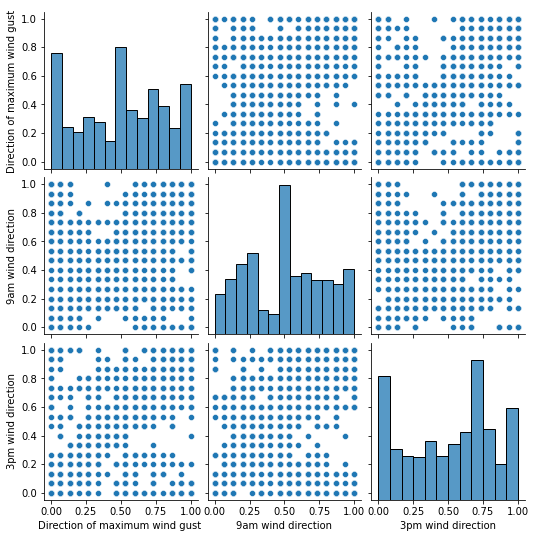

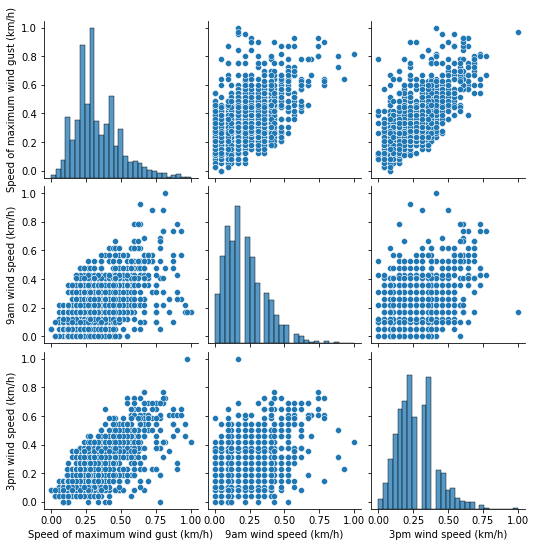

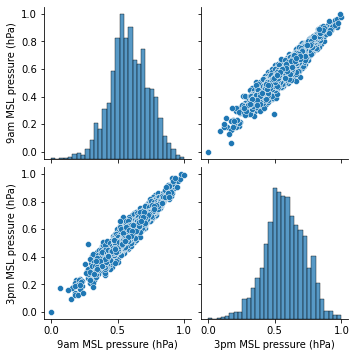

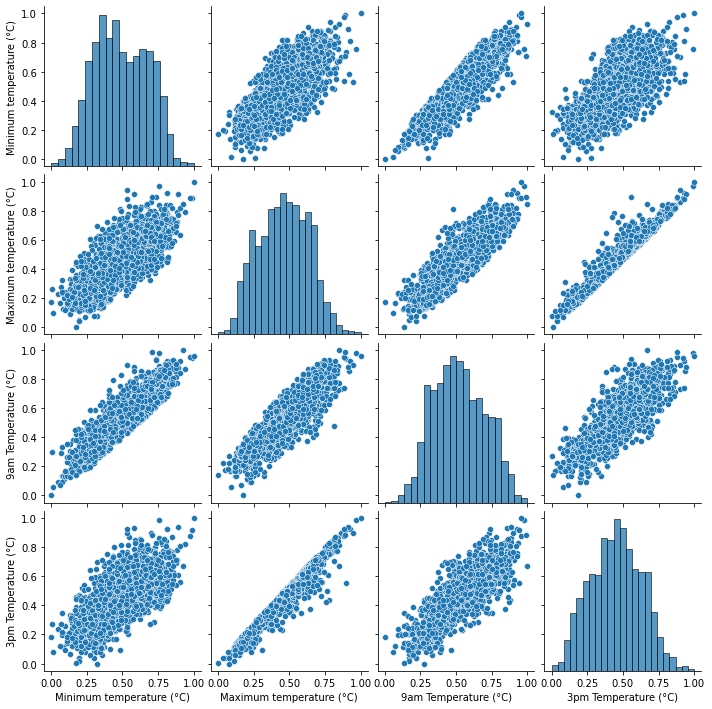

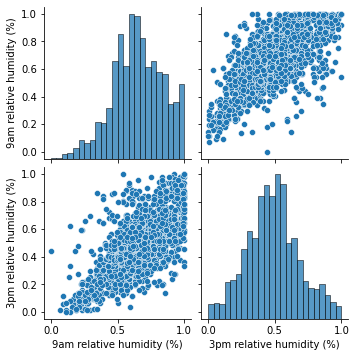

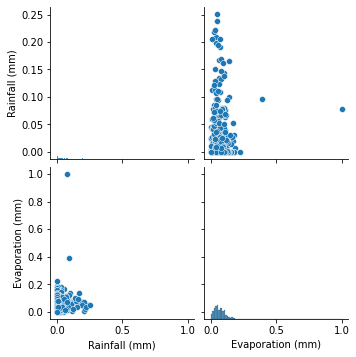

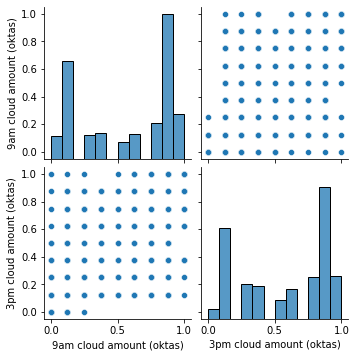

In [4]:
"""
    Plots of minmax normalised columns of the weather dataset within related groups (as per COLUMNS)
"""

min_max = MinMaxScaler()
temp_df = pd.DataFrame(min_max.fit_transform(cities_df.iloc[:, 2:]))
temp_df.columns = cities_df.columns[2:]
normalised_df = pd.concat([cities_df["REGION"], temp_df], axis=1)

[sns.pairplot(normalised_df[cols]) for cols in COLUMNS]

<AxesSubplot:ylabel='Rainfall (mm)'>

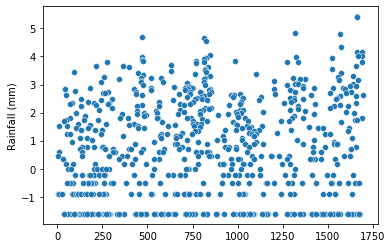

In [5]:
"""
    Rainfall plotted with a logarithmic y scale 
"""
rainfall_logscale = np.log(cities_df["Rainfall (mm)"].sort_values(ascending=False).loc[cities_df["Rainfall (mm)"] > 0])
sns.scatterplot(x=rainfall_logscale.index, y=rainfall_logscale)

<AxesSubplot:ylabel='Evaporation (mm)'>

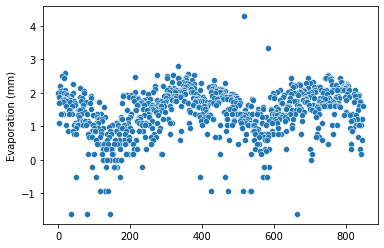

In [6]:
"""
    Evaporation plotted with a logarithmic y scale
"""
evap_logscale = np.log(cities_df["Evaporation (mm)"].sort_values(ascending=False).loc[cities_df["Evaporation (mm)"] > 0])
sns.scatterplot(x=evap_logscale.index, y=evap_logscale)

<AxesSubplot:ylabel='Evaporation (mm)'>

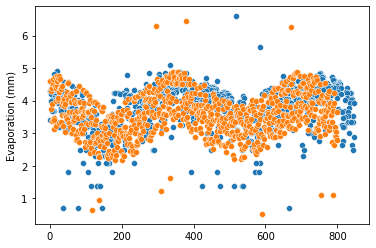

In [7]:
"""
    Evaporation plotted with a logarithmic y scale
"""
evap_logscale = np.log((cities_df["Evaporation (mm)"] * 10).sort_values(ascending=False).loc[cities_df["Evaporation (mm)"] > 0])
sns.scatterplot(x=evap_logscale.index, y=evap_logscale)

evap_fake_vals = [fake_evaporation(t) for t in range(800)]
sns.scatterplot(x=range(800), y=evap_fake_vals)